## MYNTRA_PROJECT

# Introduction to Project


Aim:

Myntra is a major Indian fashion e-commerce company headquartered in Bengaluru, Karnataka, India. The company was founded in 2007 to sell personalized gift items. In May 2014, Myntra.com was acquired by Flipkart.

We will be using data science skills to identify the apparel type that customers favours and their prices. To identify the parameter that attracts customers to make purchase. 

Is it number of images, or colours, or brand name or price?

# Problem Statement

The Myntra have shared the dataset with you to identify the attributes to increase sales. You are working as Lead consultant and your key role is to identify the parameters that are extremely important while making a decision.

As a lead consultant you also have to show the results to your client and managers so it’s advised to create charts while you perform analysis and write down the insights in some separate sheet that you can refer later on.

Some of the problems can be easily identified while solving the scenarios and tasks shared here but you are also required to further share your key points in the Conclusion.

Exploratory Data Analysis (EDA) is an approach to analysing data sets to summarize the main characteristics of data by often using statistical graphs and other visualization methods such as by the use of statistical graphs.

Task 1:

 1.  Import all the relevant packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

2. Import the datasets into the python environment.


In [2]:

df1=pd.read_csv("D:/bootcamp_project/products catalog.csv")

In [3]:
df2=pd.read_csv("D:/bootcamp_project/product details.csv")

In [4]:
df1.head(2)

,Gender,Price (INR),NumImages,ID,Description,PrimaryColor
0,Women,593,5,10182131,"Off-White printed woven A-line top, has a rou...",White
1,Men,6396,5,10052169,Display: AnalogueMovement: QuartzPower source:...,Black


In [5]:
df1.tail(2)

,Gender,Price (INR),NumImages,ID,Description,PrimaryColor
12489,Women,976,5,10246229,"A pair of black solid peep toes, has regular s...",Black
12490,Women,1299,7,10270963,Navy Blue dark wash 5-pocket mid-rise cropped ...,Navy


In [6]:
df2.head(2)

,ProductID,ProductName,ProductBrand
0,10017413,DKNY Unisex Black & Grey Printed Medium Trolle...,DKNY
1,10016283,EthnoVogue Women Beige & Grey Made to Measure ...,EthnoVogue


In [7]:
df2.tail(2)

,ProductID,ProductName,ProductBrand
12489,10266621,Bvlgari Men Aqva Pour Homme Marine Eau de Toil...,Bvlgari
12490,10265199,Pepe Jeans Men Black & Grey Striped Polo Colla...,Pepe Jeans


3.  Check the structure, statistics and other important functions. (Only observe the changes)

In [8]:
#here i have observed there is a relation between df1 and df2 is "id" and "ProductID" so to merge two datasets productid so 
#I'm converting id to productid
df1.rename(columns={"ID":"ProductID"},inplace=True)

Task2

1. Create a new dataframe “df” by joining the 2 datasets

In [9]:
#Merging the data on basis of productid
df = pd.merge(df1, df2, on=["ProductID"])
df.head()

,Gender,Price (INR),NumImages,ProductID,Description,PrimaryColor,ProductName,ProductBrand
0,Women,593,5,10182131,"Off-White printed woven A-line top, has a rou...",White,Bhama Couture Women Off-White Printed Pure Cot...,Bhama Couture
1,Men,6396,5,10052169,Display: AnalogueMovement: QuartzPower source:...,Black,Titan Octane Men Black Analogue watch NL90104KM02,Titan
2,Women,599,5,10168643,"Blue printed knitted regular top, has a high ...",Blue,Cation Women Blue Printed Crop Top,Cation
3,Men,1034,5,10155427,"Grey and Purple checked smart casual shirt, ha...",Grey,Indian Terrain Men Grey & Purple Slim Fit Chec...,Indian Terrain
4,Men,477,3,10191059,Beige and Brown striped beltReversible: NoStre...,Brown,Fastrack Men Beige & Brown Striped Belt,Fastrack


2. Drop the duplicate data

In [10]:
df.duplicated().sum()

0

Here I have observed no duplicated data so I'm not going to drop any data

3. Check for missing values

In [11]:
df.isnull().sum()

Gender            0
Price (INR)       0
NumImages         0
ProductID         0
Description       0
PrimaryColor    894
ProductName       0
ProductBrand      0
dtype: int64

In [12]:
df.shape

(12491, 8)

In [13]:
df.describe()

,Price (INR),NumImages,ProductID
count,12491.000000,12491.000000,1.249100e+04
mean,1452.660956,4.913698,9.917160e+06
std,2118.503976,1.092333,1.438006e+06
min,90.000000,1.000000,1.012060e+05
25%,649.000000,5.000000,1.006215e+07
50%,920.000000,5.000000,1.015463e+07
75%,1499.000000,5.000000,1.021565e+07
max,63090.000000,10.000000,1.027514e+07


TASK 3

1. There is a column that needs string strip operation. Identify that and apply it.

In [14]:
df["ProductName"]=df['ProductName'].str.strip()
df['ProductBrand']=df['ProductBrand'].str.strip()
df['Gender']=df['Gender'].str.strip()
df['Description']=df['Description'].str.strip()

2. Fill the missing value by ‘Others’ in the column containing it

In [15]:
df["PrimaryColor"]=df["PrimaryColor"].fillna("Other")

3. Since all the column names are single word so you can convert the ‘Price (INR)’ also to single name ‘Price’.

In [16]:
df.rename(columns = {'Price (INR)':'Price'}, inplace = True)
df.columns

Index(['Gender', 'Price', 'NumImages', 'ProductID', 'Description',
       'PrimaryColor', 'ProductName', 'ProductBrand'],
      dtype='object')

4. Analyse the Gender column and include your viewpoints how to make it useful.

In [17]:
df.dtypes

Gender          object
Price            int64
NumImages        int64
ProductID        int64
Description     object
PrimaryColor    object
ProductName     object
ProductBrand    object
dtype: object

<AxesSubplot:>

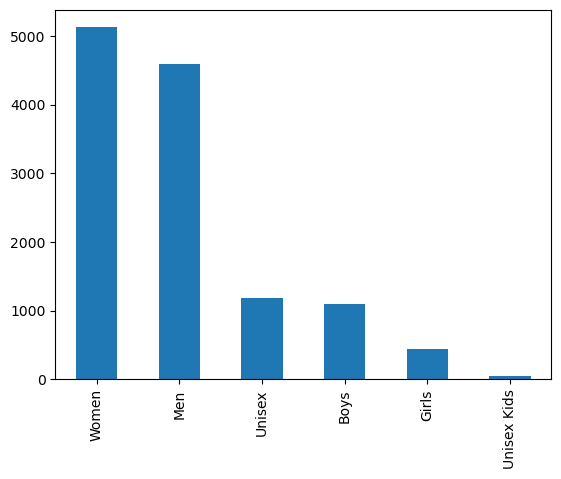

In [18]:
df["Gender"].value_counts().plot(kind="bar")

In [19]:
df.groupby("NumImages")["Price"].sum().sort_values(ascending=False).head(5)


NumImages
5    9415632
7    2429454
6    2213264
4    2057882
3    1330297
Name: Price, dtype: int64

In [20]:
df.groupby("PrimaryColor")["Price"].sum().sort_values(ascending=False).head(5)


PrimaryColor
Blue      4649698
 Black    3200440
 Red      1964379
 White    1375025
Other     1202980
Name: Price, dtype: int64

In [21]:
df.groupby("ProductBrand")["Price"].sum().sort_values(ascending=False).head(5)

ProductBrand
Indian Terrain        938042
Puma                  931545
Titan                 633252
Calvin Klein Jeans    486119
DKNY                  429620
Name: Price, dtype: int64

In [22]:
lower=df[df["Price"]<2000]

In [23]:
lower.shape

(10673, 8)

In [24]:
higher=df[df["Price"]>2000]


In [25]:
higher.shape

(1817, 8)

In [26]:
lower["Price"].sum()

9993419

In [27]:
higher["Price"].sum()

8149769

# Task 4:

1. Univariate analysis of each variable

In [28]:
df.columns

Index(['Gender', 'Price', 'NumImages', 'ProductID', 'Description',
       'PrimaryColor', 'ProductName', 'ProductBrand'],
      dtype='object')

In [29]:
df.dtypes

Gender          object
Price            int64
NumImages        int64
ProductID        int64
Description     object
PrimaryColor    object
ProductName     object
ProductBrand    object
dtype: object

<AxesSubplot:xlabel='Gender', ylabel='count'>

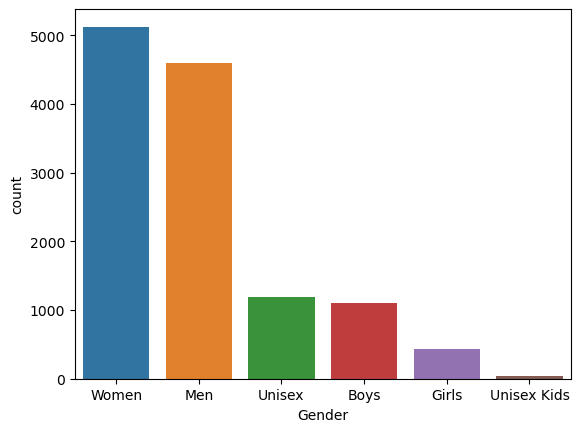

In [30]:
#Gender
sns.countplot(x=df['Gender'])


C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Price'>

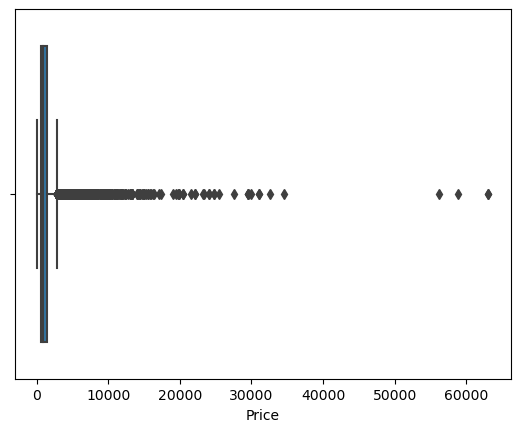

In [31]:
#Price
sns.boxplot(df["Price"])

In [32]:
print("25th percentile of price",np.percentile(df["Price"],10))
print("75th percentile of price",np.percentile(df["Price"],75))
print("80th percentile of price",np.percentile(df["Price"],80))

25th percentile of price 499.0
75th percentile of price 1499.0
80th percentile of price 1759.0


C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

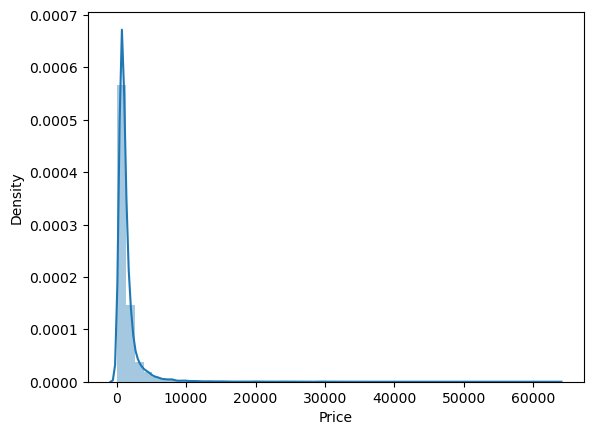

In [33]:
#Price
sns.distplot(df['Price'])

Hence price is right skewed

In [34]:
df['Price'].skew()

11.491619247745314

In [35]:
df.Price.median(),df.Price.mean()

(920.0, 1452.6609558882396)

<AxesSubplot:xlabel='NumImages', ylabel='count'>

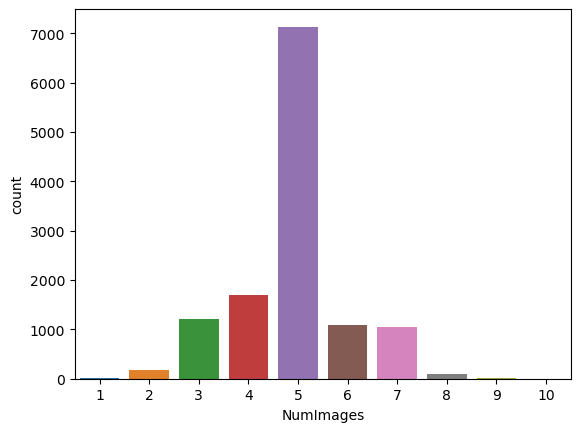

In [36]:
#NumImages
sns.countplot(x=df['NumImages'])

most of the products has 5Images

<AxesSubplot:xlabel='count', ylabel='PrimaryColor'>

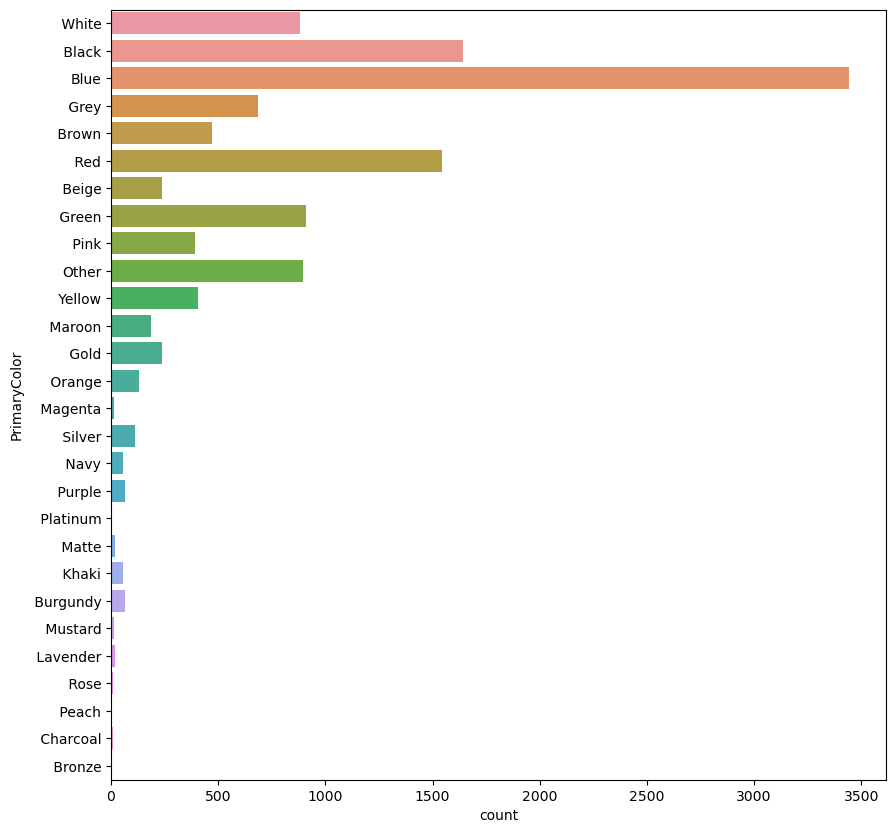

In [37]:
#Primarycolor
f,ax = plt.subplots(figsize=(10,10))
sns.countplot(y=df['PrimaryColor'])

most of the products PrimaryColor is blue

2. Bivariate Analysis of categorical vs numerical variables (Take target variable as fixed variable here)

<AxesSubplot:title={'center':'Gender wise Price'}, xlabel='Gender', ylabel='Price in 10Lakhs'>

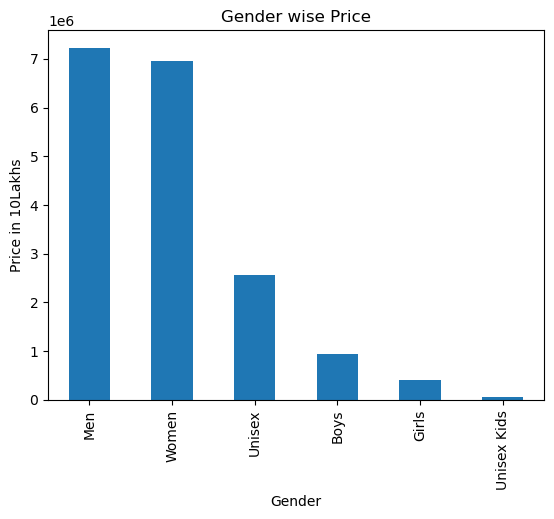

In [38]:
#Gender vs Price
df.groupby("Gender")['Price'].sum().sort_values(ascending=False).plot(kind="bar",ylabel="Price in 10Lakhs",title='Gender wise Price')

In [39]:
df[df["Gender"]=="Men"].sum()

Gender          MenMenMenMenMenMenMenMenMenMenMenMenMenMenMenM...
Price                                                     7226137
NumImages                                                   23940
ProductID                                             45531773320
Description     Display: AnalogueMovement: QuartzPower source:...
PrimaryColor     Black Grey BrownBlue BlackBlue GreenBlueOther...
ProductName     Titan Octane Men Black Analogue watch NL90104K...
ProductBrand    TitanIndian TerrainFastrackJEWEL JUNCTIONUCLAP...
dtype: object

<AxesSubplot:xlabel='Gender', ylabel='Price'>

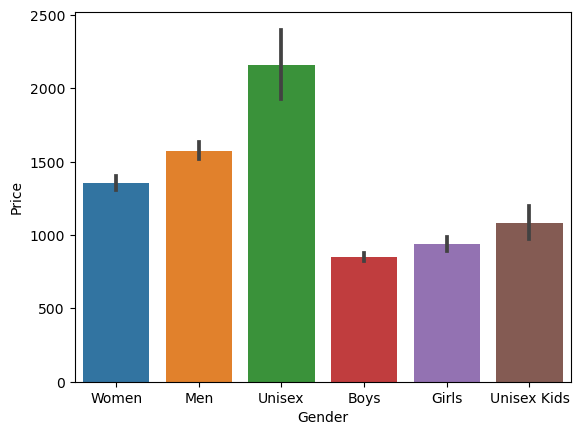

In [40]:
sns.barplot(data=df,x="Gender",y="Price")

more Unisex gender has more of orders price of 2000 near similarly more womens are order price is in between 1000 to 1500

<AxesSubplot:xlabel='NumImages', ylabel='Price in 10Lakhs'>

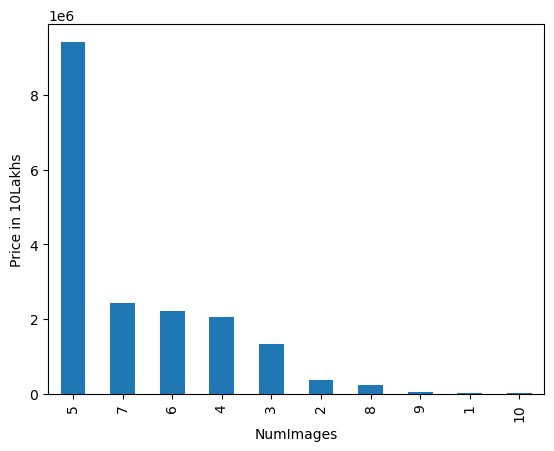

In [41]:
# NumImages vs 
df.groupby("NumImages")["Price"].sum().sort_values(ascending=False).plot(kind="bar",ylabel="Price in 10Lakhs" )

NumImages 5 has getting more revenue

In [42]:
Men=df[df["Gender"]=="Men"]
print("most of mens are favourate productBrand is", Men['ProductBrand'].mode())


most of mens are favourate productBrand is 0    Indian Terrain
Name: ProductBrand, dtype: object


In [43]:
Women=df[df["Gender"]=="Women"]
print("most of womens are favourate productBrand is", Women['ProductBrand'].mode())


most of womens are favourate productBrand is 0    AURELIA
Name: ProductBrand, dtype: object


<AxesSubplot:title={'center':'ProductBrand wise Price - top 10'}, xlabel='ProductBrand', ylabel='Price'>

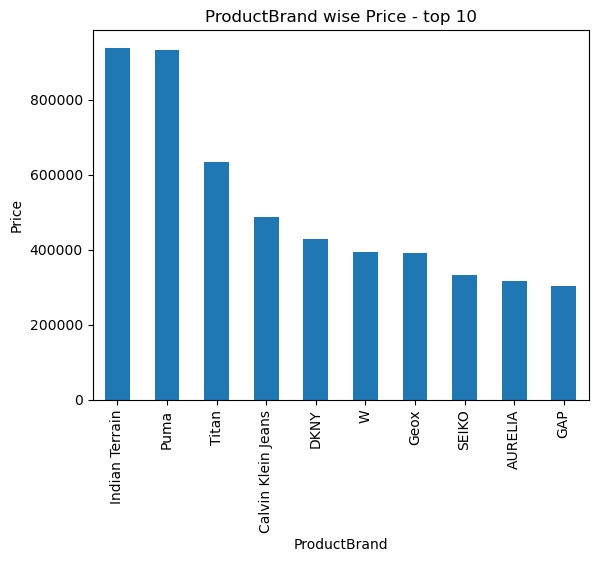

In [44]:
df.groupby("ProductBrand")["Price"].sum().sort_values(ascending=False).head(10).plot(kind='bar',ylabel="Price",title="ProductBrand wise Price - top 10")

The brand of Indian Terrain has generating more revenue to the myntra

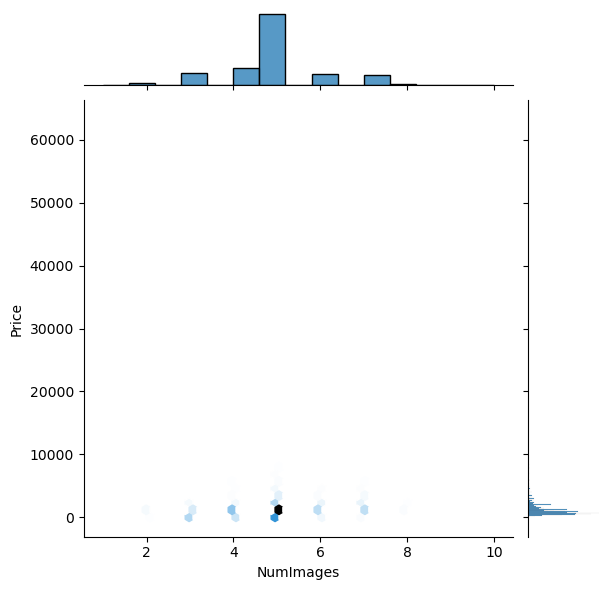

In [45]:
sns.jointplot(y ='Price', x ='NumImages', data = df, kind ='hex')

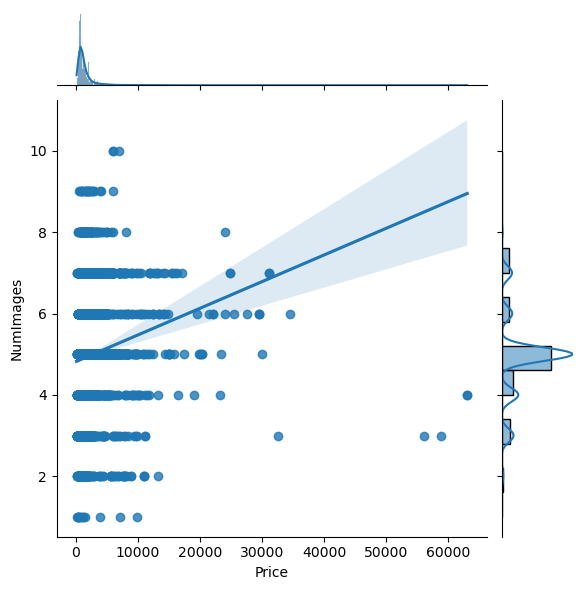

In [46]:
    sns.jointplot(x='Price', y='NumImages', data=df, kind='reg')
plt.show()

by seeing this when price is lessthan 2500 and numimages 5 at this point of time revenue has more

3. Multivariate Analysis of categorical and numerical variables

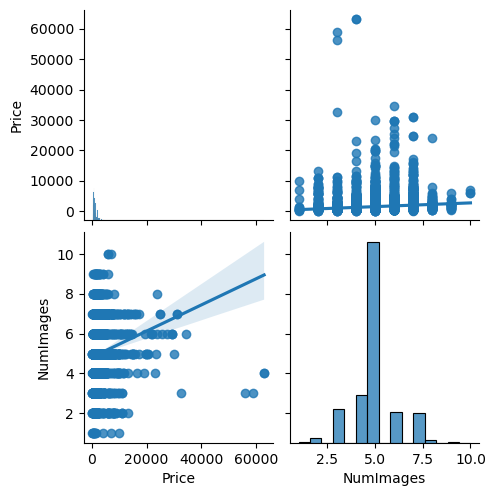

In [47]:
sns.pairplot(df, vars=['Price', 'NumImages'], kind='reg')
plt.show()

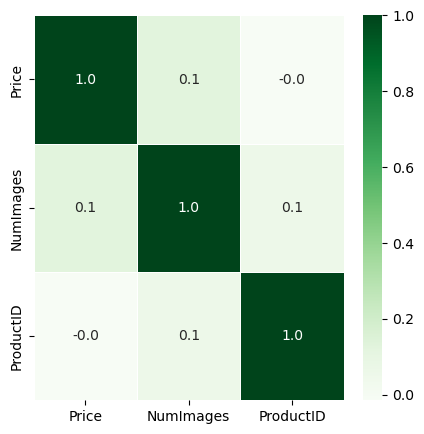

In [48]:
f,ax = plt.subplots(figsize=(5, 5))

sns.heatmap(df.corr(), annot=True, linewidths=.5, cmap='Greens',fmt='.1f',ax=ax)
plt.show()

by seeing heatmap there is no corr happening in numercial columns

<AxesSubplot:xlabel='NumImages', ylabel='Gender'>

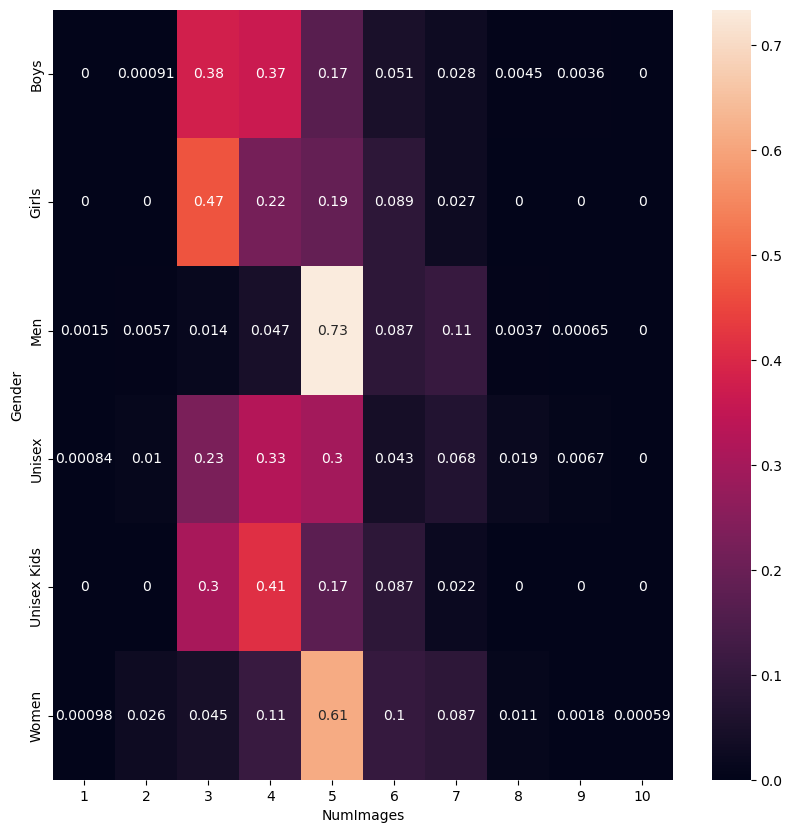

In [49]:
all=pd.crosstab(df.Gender,df.NumImages,margins=True)['All']
data=pd.crosstab(df.Gender,df.NumImages).divide(all,axis=0).dropna()
f,ax = plt.subplots(figsize=(10,10))
sns.heatmap(data,annot=True)

by seeing this there is positive corr of 0.73 for Numimages 5 and Gender has Men and positive corr of 0.61 for Numimages 5

4. Check distribution of variables

C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

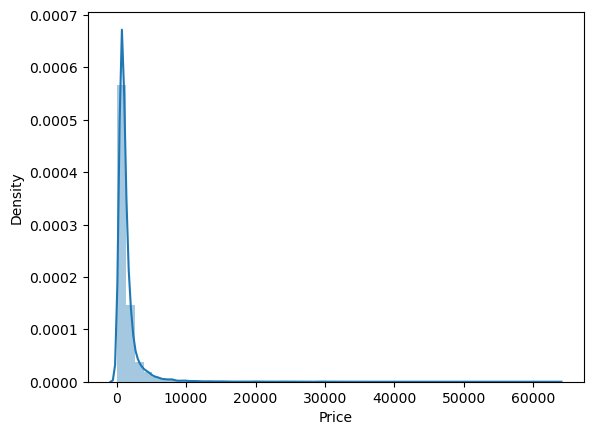

In [50]:
sns.distplot(df['Price'])

by seeing the there is right skewed

C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='NumImages', ylabel='Density'>

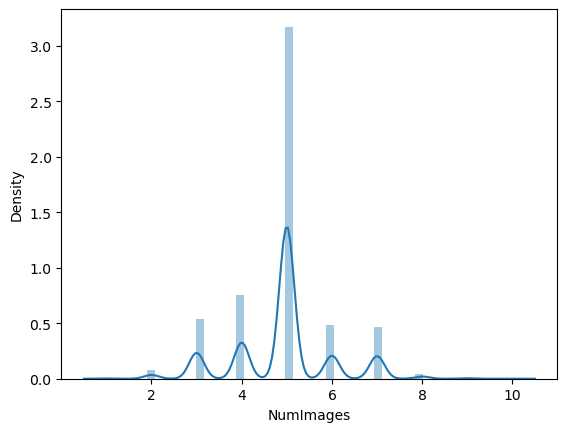

In [51]:
sns.distplot(df['NumImages'])

In [52]:
df["NumImages"].skew()

0.07105395836735152

In [53]:
df["NumImages"].mean()

4.913697862460972

In [54]:
df["NumImages"].median()

5.0

In [55]:
df["NumImages"].mode()

0    5
Name: NumImages, dtype: int64

 mean=median=mode so NumImages has normaly distributed

Task 5:

1.Create a new Column “NewGender” to analyse further its distribution. Going forward we will consider this group for tasks

In [56]:
df["Gender"].value_counts()

Women          5126
Men            4591
Unisex         1188
Boys           1100
Girls           440
Unisex Kids      46
Name: Gender, dtype: int64

In [57]:
Newgender=[]
for i in df["Gender"]:
    if i == "Boys" or i=="Men":
        Newgender.append("Men")
    elif i=="Girls" or i=="Women":
        Newgender.append("Women")
    elif i=="Unisex Kids" or i=="Unisex":
        Newgender.append("Unisex")
    else:
        Newgender.append("Other")

In [58]:
df["Newgender"]=Newgender


In [59]:
df.shape

(12491, 9)

In [60]:
df["Newgender"].value_counts()

Men       5691
Women     5566
Unisex    1234
Name: Newgender, dtype: int64

<AxesSubplot:title={'center':'Gender wise Price'}, xlabel='Newgender', ylabel='Price in 10Lakhs'>

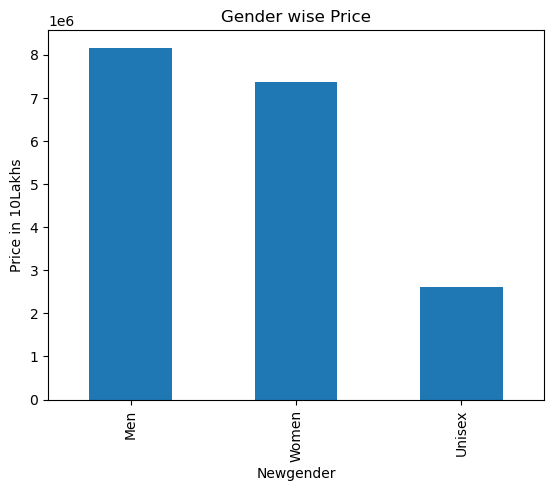

In [61]:
df.groupby("Newgender")['Price'].sum().sort_values(ascending=False).plot(kind="bar",ylabel="Price in 10Lakhs",title='Gender wise Price')

Task 6:

1.  Create a new Column “DescriptionLength” to analyse further its distribution.

In [62]:
df.columns

Index(['Gender', 'Price', 'NumImages', 'ProductID', 'Description',
       'PrimaryColor', 'ProductName', 'ProductBrand', 'Newgender'],
      dtype='object')

In [63]:
DescriptionLength=[]
for i in df["Description"]:
    DescriptionLength.append(len(i))

In [64]:
df["DescriptionLength"]=DescriptionLength

In [65]:
df.shape

(12491, 10)

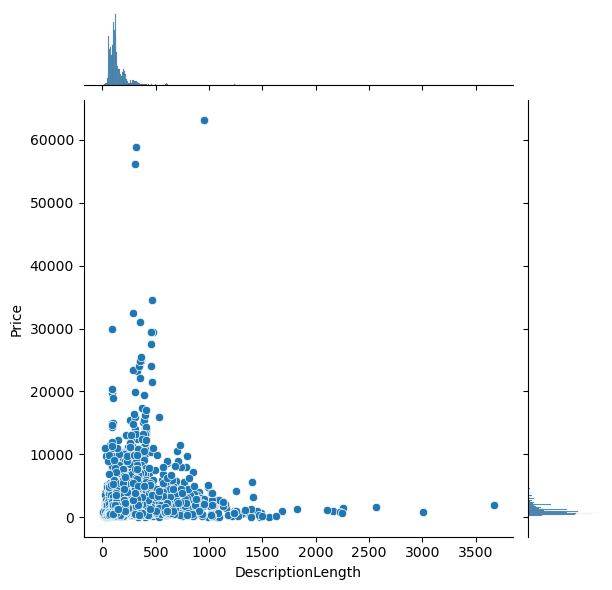

In [66]:
sns.jointplot(x="DescriptionLength",y="Price",data=df)

by seeing this DescriptionLenth < 500 and price < 2500 has more data points 

In [67]:
df.corr()

,Price,NumImages,ProductID,DescriptionLength
Price,1.000000,0.127023,-0.015126,0.213422
NumImages,0.127023,1.000000,0.058085,0.051453
ProductID,-0.015126,0.058085,1.000000,-0.024273
DescriptionLength,0.213422,0.051453,-0.024273,1.000000


here there is a small corr between price and DescriptionLength

# Conclusion:

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12491 entries, 0 to 12490
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Gender             12491 non-null  object
 1   Price              12491 non-null  int64 
 2   NumImages          12491 non-null  int64 
 3   ProductID          12491 non-null  int64 
 4   Description        12491 non-null  object
 5   PrimaryColor       12491 non-null  object
 6   ProductName        12491 non-null  object
 7   ProductBrand       12491 non-null  object
 8   Newgender          12491 non-null  object
 9   DescriptionLength  12491 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 1.3+ MB


C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Price'>

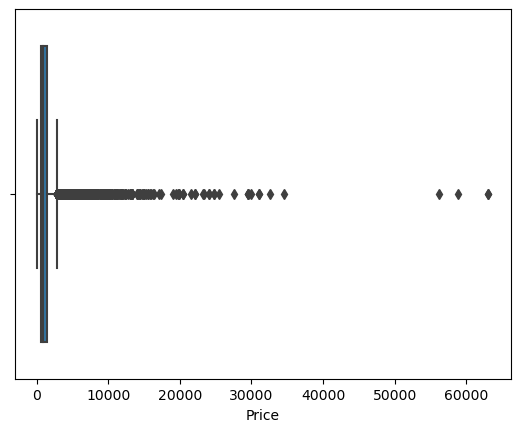

In [69]:
sns.boxplot(df["Price"])

In [70]:
df["Price"].skew()

11.491619247745314

In [71]:
df["Price"].mean(),df["Price"].median(),df["Price"].mode()

(1452.6609558882396,
 920.0,
 0    699
 Name: Price, dtype: int64)

In [72]:
q3=np.percentile(df["Price"],75)
q1=np.percentile(df["Price"],25)
minimum=q1-1.5*(q3-q1)
maximum=q3+1.5*(q3-q1)

In [73]:
minimum

-626.0

In [74]:
maximum

2774.0

In [75]:
q3

1499.0

In [76]:
q1

649.0

In [77]:
df1=df[(df["Price"]>=minimum) & (df["Price"]<=maximum)]

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Price'>

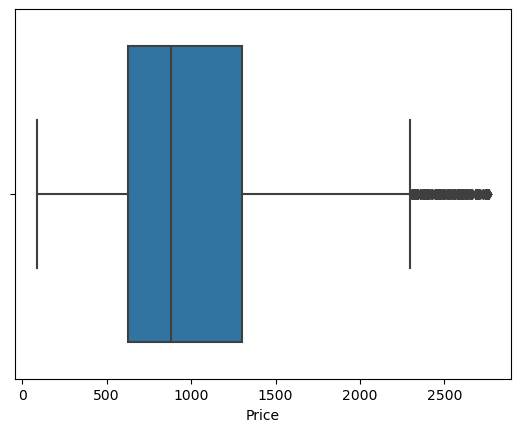

In [78]:
sns.boxplot(df1["Price"])

In [79]:
df1.shape

(11324, 10)

In [80]:
df.shape

(12491, 10)

In [81]:
df1["Price"].skew()

1.112054631743738

In [82]:
df1["Price"].mean(),df1["Price"].median(),df1["Price"].mode()

(1018.9725362062875,
 879.0,
 0    699
 Name: Price, dtype: int64)

In [83]:
df1.columns

Index(['Gender', 'Price', 'NumImages', 'ProductID', 'Description',
       'PrimaryColor', 'ProductName', 'ProductBrand', 'Newgender',
       'DescriptionLength'],
      dtype='object')

# PrimaryColor analyzing

In [84]:
df1.groupby("PrimaryColor")["Price"].count().sort_values(ascending=False)

PrimaryColor
Blue         3197
 Red         1446
 Black       1368
 Green        847
Other         827
 White        776
 Grey         606
 Brown        418
 Yellow       383
 Pink         372
 Beige        216
 Gold         192
 Maroon       169
 Orange       125
 Silver        83
 Burgundy      56
 Purple        56
 Khaki         52
 Navy          50
 Lavender      18
 Matte         17
 Mustard       15
 Magenta       13
 Charcoal       9
 Rose           6
 Bronze         3
 Peach          2
 Platinum       2
Name: Price, dtype: int64

In [85]:
df1.groupby("PrimaryColor")["Price"].sum().sort_values(ascending=False)

PrimaryColor
Blue         3225608
 Black       1515770
 Red         1437423
Other         845367
 Green        833092
 White        761775
 Grey         683459
 Brown        456996
 Pink         375590
 Yellow       332291
 Beige        248472
 Gold         177967
 Maroon       162119
 Orange       117414
 Silver        71859
 Khaki         56849
 Burgundy      49734
 Navy          47791
 Purple        47189
 Matte         24460
 Lavender      17259
 Mustard       16949
 Magenta       10573
 Rose           8827
 Charcoal       8269
 Platinum       2910
 Bronze         1764
 Peach          1069
Name: Price, dtype: int64

In [86]:
df1.columns

Index(['Gender', 'Price', 'NumImages', 'ProductID', 'Description',
       'PrimaryColor', 'ProductName', 'ProductBrand', 'Newgender',
       'DescriptionLength'],
      dtype='object')

# PrimaryColor Analyzing

In [87]:
df1.groupby("ProductBrand")["Price"].sum().sort_values(ascending=False)

ProductBrand
Indian Terrain    938042
Puma              436423
Pepe Jeans        295390
GAP               278372
W                 252379
                   ...  
VLCC                 348
Foolzy               339
St. Ives             299
Rosaline             291
Envy                 139
Name: Price, Length: 638, dtype: int64

In [88]:
df1.groupby("ProductBrand")["Price"].count().sort_values(ascending=False).head(5)

ProductBrand
Indian Terrain          971
Pepe Jeans              340
Flying Machine          301
AURELIA                 284
U.S. Polo Assn. Kids    232
Name: Price, dtype: int64

# By Analysing the data Here I found
1. most of customers are looking price of less than 2774.
2. NumImage is normaly distributed so Numimage are 5
3. Then Color of the product (blue,Black,red,other,etc..)
4. Then Product brand (Indian terrain,Pepe jeans,Flying Machine,Aurelia,etc..)
